<a href="https://colab.research.google.com/github/KenjiMatsumoto/DeepLearningProject/blob/master/harmonic_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
%ls

data.csv  kaggle.json  sample_data/


In [0]:
%mkdir /root/.kaggle/

In [0]:
%mv kaggle.json /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c recruit-restaurant-visitor-forecasting

  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 4.18MB/s]
  0% 0.00/73.9k [00:00<?, ?B/s]
100% 73.9k/73.9k [00:00<00:00, 75.5MB/s]
  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 10.9MB/s]
  0% 0.00/905k [00:00<?, ?B/s]
100% 905k/905k [00:00<00:00, 59.0MB/s]
  0% 0.00/3.34k [00:00<?, ?B/s]
100% 3.34k/3.34k [00:00<00:00, 3.38MB/s]
  0% 0.00/605k [00:00<?, ?B/s]
100% 605k/605k [00:00<00:00, 38.8MB/s]
  0% 0.00/71.1k [00:00<?, ?B/s]
100% 71.1k/71.1k [00:00<00:00, 67.1MB/s]
 37% 9.00M/24.4M [00:00<00:00, 40.0MB/s]
100% 24.4M/24.4M [00:00<00:00, 70.0MB/s]


In [0]:
!unzip air_reserve.csv.zip

Archive:  air_reserve.csv.zip
  inflating: air_reserve.csv         


In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv("air_reserve.csv")

In [0]:
data.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [0]:
data.visit_datetime = pd.to_datetime(data.visit_datetime)

In [0]:
# 循環性のある特徴量をsin / cosを基にencoding
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period 
    return np.cos(value), np.sin(value)

In [0]:
data["day_of_week"] = data.visit_datetime.dt.dayofweek
data["day_in_month"] = data.visit_datetime.dt.days_in_month
data["day_of_year"] = data.visit_datetime.dt.dayofyear
data["date"] = data.visit_datetime.dt.date
data["hour"] = data.visit_datetime.dt.hour
data["day"] = data.visit_datetime.dt.day
data["month"] = data.visit_datetime.dt.month
data["year"] = data.visit_datetime.dt.year

In [0]:
from functools import partial

In [0]:
# partialを利用してperiodをweekであれば7、yearであれば365などに固定する
dow_make_features = partial(make_harmonic_features, period=7)

In [0]:
data.day_of_week.apply(dow_make
                       _features).head()

0    (-0.9009688679024191, -0.433883739117558)
1    (-0.9009688679024191, -0.433883739117558)
2    (-0.9009688679024191, -0.433883739117558)
3    (-0.9009688679024191, -0.433883739117558)
4    (-0.9009688679024191, -0.433883739117558)
Name: day_of_week, dtype: object

In [0]:
data.day_of_week.unique()

array([4, 5, 6, 0, 1, 2, 3])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_cycle(_data, preprocess_func):
  x = []
  y = []
  for u in np.sort(_data.unique()):
    _cos, _sin = preprocess_func(u)
    x.append(_sin)
    y.append(_cos)
  # ref: https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
  fig = plt.figure()
  fig.gca().set_aspect('equal')
  plt.scatter(x, y)

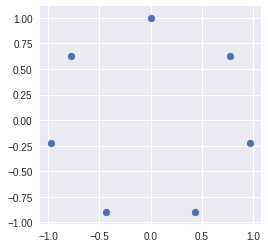

In [0]:
plot_cycle(data.day_of_week, dow_make_features)

In [0]:
doy = partial(make_harmonic_features, period=365)

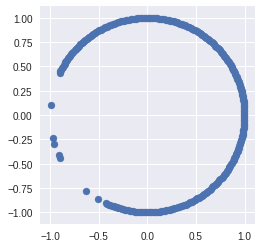

In [0]:
plot_cycle(data.day_of_year, doy)

In [0]:
hour = partial(make_harmonic_features, period=24)

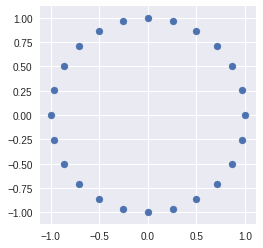

In [0]:
plot_cycle(data.hour, hour)